## Task:

Make the graph mentioned below.

**Input** : initial_state = AgentState(num1 = 10, operator1 = "+", num2 = 5, 
                num3 = 4, operator2 = "-", num4 = 9, finalNumber1=0, finalNumber2 = 0)

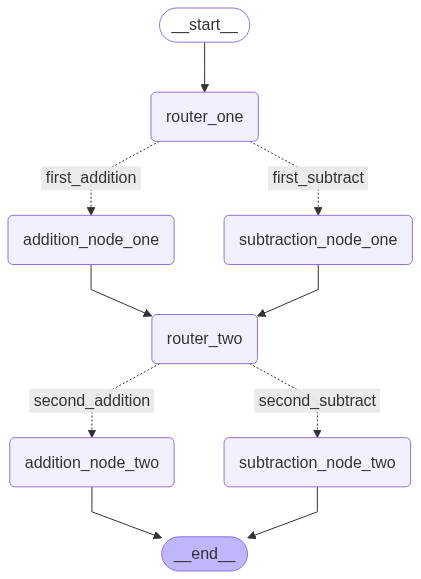

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    """This state would be used to store the state of an agent in a simple arithmetic task."""
    num1 : int
    operator1 : str
    num2 : int
    num3 : int
    operator2 : str
    num4 : int
    finalNumber1 : int
    finalNumber2 : int

In [3]:
def addition_one(state: AgentState) -> AgentState:
    """Perform addition on the first two numbers."""
    state['finalNumber1'] = state['num1'] + state['num2']
    return state

def subtraction_one(state: AgentState) -> AgentState:
    """Perform subtraction on the first two numbers."""
    if state['num1'] < state['num2']:
        state['finalNumber1'] = state['num1'] - state['num2']
    else:
        state['finalNumber1'] = state['num2'] - state['num1']
    return state


def decide_next_node_one(state: AgentState) -> str:
    """Decide where to go next based on the operator.
    It returns the next node to visit."""

    if state['operator1'] == '+':
        return "first_addition"
    elif state['operator1'] == '-':
        return "first_subtract"
    else:
        raise ValueError("Invalid operator")
    
def addition_two(state: AgentState) -> AgentState:
    """Perform addition on the first two numbers."""
    state['finalNumber2'] = state['num3'] + state['num4']
    return state

def subtraction_two(state: AgentState) -> AgentState:
    """Perform subtraction on the first two numbers."""
    if state['num3'] < state['num4']:
        state['finalNumber2'] = state['num3'] - state['num4']
    else:
        state['finalNumber2'] = state['num3'] - state['num4']
    return state


def decide_next_node_two(state: AgentState) -> str:
    """Decide where to go next based on the operator.
    It returns the next node to visit."""

    if state['operator2'] == '+':
        return "second_addition"
    elif state['operator2'] == '-':
        return "second_subtract"
    else:
        raise ValueError("Invalid operator")
    

In [4]:
graph = StateGraph(AgentState)


graph.add_node("addition_node_one", addition_one)
graph.add_node("subtraction_node_one", subtraction_one)
graph.add_node("router_one", lambda state: state)

graph.add_node("addition_node_two", addition_two)
graph.add_node("subtraction_node_two", subtraction_two)
graph.add_node("router_two", lambda state: state)


graph.add_edge(START, "router_one")
graph.add_conditional_edges(
    "router_one", 
    decide_next_node_one,
    {
        "first_addition": "addition_node_one",
        "first_subtract": "subtraction_node_one",
    }
)



graph.add_edge("addition_node_one", "router_two")
graph.add_edge("subtraction_node_one", "router_two")
graph.add_conditional_edges(
    "router_two", 
    decide_next_node_two,
    {
        "second_addition": "addition_node_two",
        "second_subtract": "subtraction_node_two",
    }
)

graph.add_edge("addition_node_two", END)
graph.add_edge("subtraction_node_two", END)



app = graph.compile()

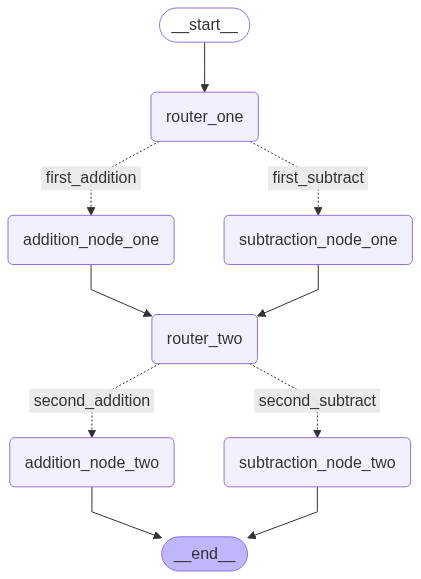

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state = AgentState(num1 = 10, operator1="-", num2 = 5, num3 = 7, num4=2, operator2="+", finalNumber1= 0, finalNumber2 = 0)

In [7]:
print(app.invoke(initial_state))

{'num1': 10, 'operator1': '-', 'num2': 5, 'num3': 7, 'operator2': '+', 'num4': 2, 'finalNumber1': -5, 'finalNumber2': 9}
